In [1]:
import pandas as pd
pd.set_option("display.max_row", None)
%load_ext autoreload
%autoreload 2

In [13]:
from absbox import API,mkDeal,Endpoints,EnginePath
localAPI = API(EnginePath.LOCAL,check=False)

import toolz as tz

Connecting engine server -> http://localhost:8081

✅Connected, local lib:0.26.4, server:0.28.1

In [43]:
ast = ["Mortgage"
          ,{"originBalance":169_011_8000,"originRate":["fix",0.238],"originTerm":10
              ,"freq":"Monthly","type":"Level","originDate":"2023-08-19"}
          ,{"currentBalance":150_000_0000 
              ,"currentRate":0.238
              ,"remainTerm":9
              ,"status":"current"}]

r = localAPI.runAsset("2023-08-01"
                     ,[ast]
                     ,poolAssump=("Pool",("Mortgage",None,None,None,None)
                                        ,None
                                        ,None)
                     ,read=True)

In [4]:
r[0]

,余额,本金,利息,早偿金额,违约金额,回收金额,损失金额,利率,债务人数量,早偿手续费,累计还款,累计早偿,累计拖欠,累计违约,累计回收,累计损失
日期,,,,,,,,,,,,,,,,
2023-09-19,1.500000e+09,0.000000e+00,0.00,0,0,0,0,0.238,None,None,0.000000e+00,0,0,0,0,0
2023-10-19,1.346123e+09,1.538772e+08,29749500.00,0,0,0,0,0.238,None,None,1.538772e+08,0,0,0,0,0
2023-11-19,1.189194e+09,1.569291e+08,26697653.20,0,0,0,0,0.238,None,None,3.108063e+08,0,0,0,0,0
2023-12-19,1.029152e+09,1.600414e+08,23585279.13,0,0,0,0,0.238,None,None,4.708477e+08,0,0,0,0,0
2024-01-19,8.659368e+08,1.632155e+08,20411177.35,0,0,0,0,0.238,None,None,6.340632e+08,0,0,0,0,0
2024-02-19,6.994842e+08,1.664526e+08,17174123.60,0,0,0,0,0.238,None,None,8.005158e+08,0,0,0,0,0
2024-03-19,5.297303e+08,1.697538e+08,13872869.37,0,0,0,0,0.238,None,None,9.702697e+08,0,0,0,0,0
2024-04-19,3.566097e+08,1.731206e+08,10506141.36,0,0,0,0,0.238,None,None,1.143390e+09,0,0,0,0,0
2024-05-19,1.800557e+08,1.765541e+08,7072641.04,0,0,0,0,0.238,None,None,1.319944e+09,0,0,0,0,0


In [5]:
from absbox import SPV
name = "安逸花 2023 年第六期个人消费贷款资产支持证券"
dates = {"cutoff":"2023-09-19","closing":"2023-12-26","firstPay":"2024-01-26"
        ,"stated":"2028-09-26","poolFreq":"MonthEnd","payFreq":["DayOfMonth",26]}

ast = ["Mortgage"
          ,{"originBalance":169_011_8000,"originRate":["fix",0.238],"originTerm":14
              ,"freq":"Monthly","type":"Level","originDate":"2023-08-01"}
          ,{"currentBalance":150_000_0000 
              ,"currentRate":0.238
              ,"remainTerm":13
              ,"status":"current"}]

pool = {'assets':[],
       'cashflow':[['2023-09-30', 1453524800.0, 46475200.00000001, 6781000.0],
                 ['2023-10-31', 1237955200.0, 215569600.0, 29466800.0],
                 ['2023-11-30', 1031302500.0, 206652800.0, 24392500.0],
                 ['2023-12-31', 888055800.0, 143246600.0, 20622700.0],
                 ['2024-01-31', 753623800.0, 134432100.0, 17626200.0],
                 ['2024-02-29', 623174300.0, 130449500.0, 14740100.0],
                 ['2024-03-31', 512203700.0, 110970600.0, 12547300.0],
                 ['2024-04-30', 405297600.0, 106906000.0, 10096600.0],
                 ['2024-05-31', 296347300.0, 108950300.0, 8101100.0],
                 ['2024-06-30', 192632700.0, 103714599.99999999, 5847600.0],
                 ['2024-07-31', 90549000.0, 102083799.99999999, 3847900.0],
                 ['2024-08-31', 8891300.0, 81657600.0, 1799600.0],
                 ['2024-09-30', 4200.0, 8887100.0, 176800.0],
                 ['2024-10-31', 0.0, 4200.0, 100.0]]
            ,'extendBy':"MonthEnd"
       }

accounts = {"本金分账户":{"balance":0}
            ,"收入分账户":{"balance":0}
            ,"流动性储备":{"balance":15_000_000
                         ,"type":{"targetReserve":[("sum",("feeDue","增值税","服务费")
                                                         ,("bondDueInt","A1","A2"))
                                                   ,2.0]}
                         }}
bonds = {"A1":{"balance":450_000_000
            ,"rate":0.0295
            ,"originBalance":450_000_000
            ,"originRate":0.0295
            ,"startDate":"2023-12-26"
            ,"rateType":{"Fixed":0.0295}
            ,"maturityDate":"2024-10-26"
            ,"bondType":{"PAC":
                           [["2024-01-26",450_000_000]
                           ,["2024-02-26",450_000_000]
                           ,["2024-03-26",450_000_000]
                           ,["2024-04-26",450_000_000]
                           ,["2024-05-26",450_000_000]
                           ,["2024-06-26",450_000_000]
                           ,["2024-07-26",450_000_000]
                           ,["2024-08-26",252_000_000]
                           ,["2024-09-26",162_000_000]
                           ,["2024-10-26",90_000_000]
                           ,["2024-11-20",0]
                           ]}}
        ,"A2":{"balance":660_000_000
            ,"rate":0.03
            ,"originBalance":660_000_000
            ,"originRate":0.03
            ,"startDate":"2023-12-26"
            ,"maturityDate":"2024-12-18"
            ,"rateType":{"Fixed":0.03}
            ,"bondType":{"Sequential":None}}
        ,"B":{"balance":165_000_000
            ,"rate":0.035
            ,"originBalance":165_000_000
            ,"originRate":0.035
            ,"startDate":"2023-12-26"
            ,"maturityDate":"2025-01-26"
            ,"rateType":{"Fixed":0.035}
            ,"bondType":{"Sequential":None}
            }
        ,"R":{"balance":225_000_000
            ,"rate":0.0
            ,"originBalance":225_000_000
            ,"originRate":0.0
            ,"startDate":"2023-12-26"
            ,"maturityDate":"2025-09-26"
            ,"rateType":{"Fixed":0.00}
            ,"bondType":{"Equity":None}
            }       
        }

waterfall = {"default":[
                ["calcFee","增值税","服务费"]
                ,["calcInt","A1","A2","B"]
                ,["IfElse",["all", [("isPaidOff", "A2","A1","B"),False]
                                 , [("status", "Defaulted"),False]]
                    ,[["transfer","流动性储备","收入分账户",{"reserve":"excess"}]]
                    ,[["transfer","流动性储备","收入分账户"]]
                 ]
                ,["payFeeBySeq", "收入分账户", ["增值税"],{'support':["account","本金分账户",['AccountDraw','abcd']]}]
                ,["payFee", "收入分账户", ["服务费"],{"limitCap":50000,'support':["account","本金分账户",['AccountDraw','abcd']]}]
                ,["payInt","收入分账户",["A1","A2"],{'support':["account","本金分账户",['AccountDraw','abcd']]}]
                ,["payInt","收入分账户",["B"],{'support':["account","本金分账户",['AccountDraw','abcd']]}]
                ,["transfer","本金分账户","收入分账户",{"formula":("floorWithZero"
                                                         ,("-"
                                                           ,("reserveGap","流动性储备")
                                                           ,("accountBalance","收入分账户")))}]
                ,["transfer","收入分账户","流动性储备", {"reserve":"gap"}]
                
                ,["IfElse",["status", "Accelerated"]
                          ,[["transfer","收入分账户","本金分账户"]]
                          ,[["transfer","收入分账户","本金分账户",{"冲销":"abcd"}]
                           ,["transfer","收入分账户","本金分账户"]]
                          ]
                # principal distribution
                ,["transfer", "本金分账户", "收入分账户", {"冲销":"abcd"}]
                ,["IfElse", ["status", "Revolving"]
                    ,[
                     #   ["buyAsset",["Current|Defaulted", 1.0, 0.0],"本金分账户"]
                     ]
                    ,[["IfElse", ["status", "Accelerated"]
                         ,[["payPrinResidual","本金分账户",["A1","A2"]]]
                         ,[
                             ["If",[("isPaidOff", "A2"),False]
                                  ,['payPrin',"本金分账户",["A1"]]
                                  ,['payPrin',"本金分账户",["A2"]]
                                  ]
                             ,["If",["all"
                                    ,[("isPaidOff", "A1"),True]
                                    ,[("isPaidOff", "A2"),False]]
                                   ,["payPrin","本金分账户",["A2"]]]
                             ,["If",["all"
                                     ,[("isPaidOff", "A1"),False]
                                     ,[("isPaidOff", "A2"),True]]
                                   ,["payPrinResidual","本金分账户",["A1"]]]
                          ]
                      ]
                    ,["payPrin","本金分账户",["B"]]
                    ,["payFee", "本金分账户", ["服务费"]]
                    ,["payPrin", "本金分账户", ["R"]]
                    ,["payIntResidual","本金分账户","R"]]
                 ]
            ],
            
            "endOfCollection":[["bookBy",["formula","abcd"
                                 ,"Credit",("curPoolCollection",None,"Defaults")]]]
            }
collects = [["CollectedInterest","收入分账户"]
            ,["CollectedPrincipal","本金分账户"]
            ,["CollectedPrepayment","本金分账户"]
            ,["CollectedRecoveries","本金分账户"]]

fees = {
    "增值税":{"类型":{"差额费用":[("factor"
                                   ,("资产池累计",None,"利息"),0.0326)
                                   ,("费用支付总额",None,"增值税")]}}
    ,"服务费":{"type":{"fixFee":100}}
}         

triggers = {"BeforeCollect": # optional
              {"加速清偿":
                {"condition":[("cumPoolDefaultedRate",),">"
                              ,[["2024-12-26",0.06]
                               ,["2025-12-26",0.08]]]
                ,"effects":("newStatus","Accelerated")
                ,"status":False
                ,"curable":False}
              ,
              "GoToAmort":
                {"condition":[">=","2024-07-31"]
                ,"effects":("newStatus","Amortizing")
                ,"status":False
                ,"curable":False}
              }            
}

ledgers = {"abcd":{"balance":0.0}}
         
deal_data = {
    "name":name
    ,"dates":dates
    ,"pool":pool
    ,"accounts":accounts
    ,"bonds":bonds
    ,"fees":fees
    ,"waterfall":waterfall
    ,"collect":collects
    ,"triggers":triggers
    ,"ledgers":ledgers
    ,"status":("PreClosing","Revolving")
}

from absbox import mkDeal
AYH_2023_6 = mkDeal(deal_data)  ## now a generic class created

In [58]:
revol_asset = ["Mortgage"
                ,{"originBalance":2200,"originRate":["fix",0.22],"originTerm":12
                  ,"freq":"Monthly","type":"Level","originDate":"2023-07-01"}
                  ,{"currentBalance":2200
                  ,"currentRate":0.22
                  ,"remainTerm":12
                  ,"status":"current"}]

r = localAPI.run(AYH_2023_6
                 ,poolAssump = ("Pool",("Mortgage",None,None,None,None)
                                          ,None
                                          ,None)
                 ,runAssump = [("revolving"
                                    ,["constant",revol_asset]
                                    ,("Pool",("Mortgage",None,None,None,None)
                                              ,None
                                              ,None))
                              ,("pricing"
                                  ,{"date":"2023-12-26"
                                    ,"curve":[["2021-01-01",0.025]
                                             ,["2024-08-01",0.025]]})
                              #,("stop","2024-01-02")
                              ]
                 ,showWarning=True
                 ,read=True)

A 2024-06-08 21:39:15.515480
B 2024-06-08 21:39:15.517014
C 2024-06-08 21:39:15.562146


Warning Message from server:
No waterfall distribution found on date2024-01-26with statusRevolving
No waterfall distribution found on date2024-02-26with statusRevolving
No waterfall distribution found on date2024-03-26with statusRevolving
No waterfall distribution found on date2024-04-26with statusRevolving
No waterfall distribution found on date2024-05-26with statusRevolving
No waterfall distribution found on date2024-06-26with statusRevolving
No waterfall distribution found on date2024-07-26with statusRevolving
No waterfall distribution found on date2024-08-26with statusAmortizing
No waterfall distribution found on date2024-09-26with statusAmortizing
No waterfall distribution found on date2024-10-26with statusAmortizing
No waterfall distribution found on date2024-11-26with statusAmortizing

D 2024-06-08 21:39:15.569155
E 2024-06-08 21:39:15.569186


In [59]:
r['result']['status'] # 2024-01-31 - 4

,Date,From,To
0,2024-07-31,Revolving,Amortizing
1,2023-12-26,PreClosing,Revolving
2,2024-11-30,DealEnd,No Pool Cashflow/All Account is zero/Not revol...


In [56]:
r['result']['status'] # "2024-02-28" - 8

,Date,From,To
0,2024-07-31,Revolving,Amortizing
1,2023-12-26,PreClosing,Revolving
2,2024-11-30,DealEnd,No Pool Cashflow/All Account is zero/Not revol...


In [33]:
r['result']['status'] # "2024-03-01", 16

,Date,From,To
0,2023-12-26,PreClosing,Revolving
1,2023-12-26,PreClosing,Revolving
2,2023-12-26,PreClosing,Revolving
3,2023-12-26,PreClosing,Revolving
4,2023-12-26,PreClosing,Revolving
5,2023-12-26,PreClosing,Revolving
6,2023-12-26,PreClosing,Revolving
7,2023-12-26,PreClosing,Revolving
8,2023-12-26,PreClosing,Revolving
9,2023-12-26,PreClosing,Revolving


In [41]:
r['result']['status'] # "2024-04-01", 32

,Date,From,To
0,2023-12-26,PreClosing,Revolving
1,2023-12-26,PreClosing,Revolving
2,2023-12-26,PreClosing,Revolving
3,2023-12-26,PreClosing,Revolving
4,2023-12-26,PreClosing,Revolving
5,2023-12-26,PreClosing,Revolving
6,2023-12-26,PreClosing,Revolving
7,2023-12-26,PreClosing,Revolving
8,2023-12-26,PreClosing,Revolving
9,2023-12-26,PreClosing,Revolving


In [42]:
r['result']['status'] # "2024-04-02" 32

,Date,From,To
0,2023-12-26,PreClosing,Revolving
1,2023-12-26,PreClosing,Revolving
2,2023-12-26,PreClosing,Revolving
3,2023-12-26,PreClosing,Revolving
4,2023-12-26,PreClosing,Revolving
5,2023-12-26,PreClosing,Revolving
6,2023-12-26,PreClosing,Revolving
7,2023-12-26,PreClosing,Revolving
8,2023-12-26,PreClosing,Revolving
9,2023-12-26,PreClosing,Revolving


In [39]:
r['result']['status'] # "2024-05-02" 64

,Date,From,To
0,2023-12-26,PreClosing,Revolving
1,2023-12-26,PreClosing,Revolving
2,2023-12-26,PreClosing,Revolving
3,2023-12-26,PreClosing,Revolving
4,2023-12-26,PreClosing,Revolving
5,2023-12-26,PreClosing,Revolving
6,2023-12-26,PreClosing,Revolving
7,2023-12-26,PreClosing,Revolving
8,2023-12-26,PreClosing,Revolving
9,2023-12-26,PreClosing,Revolving


In [45]:
r['bonds']['A2']

,balance,interest,principal,rate,cash,intDue,intOverInt,factor,memo
date,,,,,,,,,
2024-01-26,660000000,1681643.83,0,0.03,1.681644e+06,0,0,1.0,<PayInt:A2>
2024-02-26,660000000,1681643.83,0,0.03,1.681644e+06,0,0,1.0,<PayInt:A2>
2024-03-26,660000000,1573150.68,0,0.03,1.573151e+06,0,0,1.0,<PayInt:A2>
2024-04-26,660000000,1681643.83,0,0.03,1.681644e+06,0,0,1.0,<PayInt:A2>
2024-05-26,660000000,1627397.26,0,0.03,1.627397e+06,0,0,1.0,<PayInt:A2>
2024-06-26,660000000,1681643.83,0,0.03,1.681644e+06,0,0,1.0,<PayInt:A2>
2024-07-26,660000000,1627397.26,0,0.03,1.627397e+06,0,0,1.0,<PayInt:A2>
2024-08-26,0,1681643.83,660000000,0.03,6.616816e+08,0,0,0.0,"[<PayInt:A2>, <PayPrin:A2>]"


In [46]:
r['bonds']['A1']

,balance,interest,principal,rate,cash,intDue,intOverInt,factor,memo
date,,,,,,,,,
2024-01-26,450000000,1127465.75,0,0.0295,1.127466e+06,0,0,1.0,<PayInt:A1>
2024-02-26,450000000,1127465.75,0,0.0295,1.127466e+06,0,0,1.0,<PayInt:A1>
2024-03-26,450000000,1054726.02,0,0.0295,1.054726e+06,0,0,1.0,<PayInt:A1>
2024-04-26,450000000,1127465.75,0,0.0295,1.127466e+06,0,0,1.0,<PayInt:A1>
2024-05-26,450000000,1091095.89,0,0.0295,1.091096e+06,0,0,1.0,<PayInt:A1>
2024-06-26,450000000,1127465.75,0,0.0295,1.127466e+06,0,0,1.0,<PayInt:A1>
2024-07-26,450000000,1091095.89,0,0.0295,1.091096e+06,0,0,1.0,<PayInt:A1>
2024-08-26,0,1127465.75,450000000,0.0295,4.511275e+08,0,0,0.0,"[[<PayInt:A1>, <PayPrin:A1>], <PayPrin:A1>]"


In [15]:
-2.520000e+08-1.980000e+08+8.817089e+08

431708900.0

In [12]:
r['accounts']['本金分账户'].loc["2024-08-26"]

,balance,change,memo
date,,,
2024-08-26,1.541286e+09,0.000000e+00,<SupportDraw:>
2024-08-26,1.541286e+09,0.000000e+00,<SupportDraw:>
2024-08-26,1.541286e+09,0.000000e+00,<SupportDraw:>
2024-08-26,1.541286e+09,0.000000e+00,<SupportDraw:>
2024-08-26,1.541286e+09,0.000000e+00,"<TransferBy:本金分账户,收入分账户,DS (FloorWithZero (Sub..."
2024-08-26,1.541286e+09,0.000000e+00,"<TransferBy:收入分账户,本金分账户,ClearLedger ""abcd"">"
2024-08-26,1.541709e+09,4.228694e+05,"<Transfer:收入分账户,本金分账户>"
2024-08-26,1.541709e+09,0.000000e+00,"<TransferBy:本金分账户,收入分账户,ClearLedger ""abcd"">"
2024-08-26,1.343709e+09,-1.980000e+08,<PayPrin:A1>


In [14]:
r['accounts']['收入分账户'].loc["2024-08-26"]

,balance,change,memo
date,,,
2024-08-26,3847900.00,0.00,"<TransferBy:流动性储备,收入分账户,TillSource>"
2024-08-26,3847900.00,0.00,"<TransferBy:流动性储备,收入分账户,DS (Substract [Sum [Cu..."
2024-08-26,3722458.46,-125441.54,<SeqPayFee:增值税>
2024-08-26,3722458.46,0.00,<SeqPayFee:服务费>
2024-08-26,913348.88,-2809109.58,<PayInt:A1A2>
2024-08-26,422869.43,-490479.45,<PayInt:B>
2024-08-26,422869.43,0.00,"<TransferBy:本金分账户,收入分账户,DS (FloorWithZero (Sub..."
2024-08-26,422869.43,0.00,"<TransferBy:收入分账户,流动性储备,TillTarget>"
2024-08-26,422869.43,0.00,"<TransferBy:收入分账户,本金分账户,ClearLedger ""abcd"">"


In [14]:
r['accounts']['流动性储备'].loc["2024-08-26"]

,balance,change,memo
date,,,
2024-08-26,5818249.82,0.0,"<TransferBy:流动性储备,收入分账户,TillSource>"
2024-08-26,5818249.82,0.0,"<TransferBy:流动性储备,收入分账户,DS (Substract [Sum [Cu..."
2024-08-26,5818249.82,0.0,"<TransferBy:收入分账户,流动性储备,TillTarget>"


In [53]:
r['result']['bonds']

,Balance Defaults,Interest Defaults,Original Balance,Total
A2,0,0,660000000,0
A1,0,0,450000000,0
R,0,0,225000000,0
B,0,0,165000000,0


In [55]:
len(r['result']['status'])

4105

,Date,From,To
0,2023-12-26,PreClosing,Revolving
1,2023-12-26,PreClosing,Revolving
2,2023-12-31,DealEnd,Stop Run Flag


In [56]:
len(r['result']['status'])

4105

In [39]:
r['result']['status'].loc[4100:4104]

,Date,From,To
4100,2023-12-26,PreClosing,Revolving
4101,2023-12-26,PreClosing,Revolving
4102,2023-12-26,PreClosing,Revolving
4103,2023-12-26,PreClosing,Revolving
4104,2024-11-30,DealEnd,No Pool Cashflow/All Account is zero/Not revol...


In [12]:
r['pool']['flow']

,Balance,Principal,Interest,Prepayment,Default,Recovery,Loss,WAC,BorrowerNum,PrepayPenalty,CumPrincipal,CumPrepay,CumDelinq,CumDefault,CumRecovery,CumLoss
Date,,,,,,,,,,,,,,,,
2023-12-26,1.031302e+09,4.686976e+08,60640300,0,0,0,0,0,None,None,4.686976e+08,0,0,0,0,0
2023-12-31,8.880558e+08,1.432466e+08,20622700,0,0,0,0,0,None,None,6.119442e+08,0,0,0,0,0
2024-01-31,7.536237e+08,1.344321e+08,17626200,0,0,0,0,0,None,None,7.463763e+08,0,0,0,0,0
2024-02-29,6.231742e+08,1.304495e+08,14740100,0,0,0,0,0,None,None,8.768258e+08,0,0,0,0,0
2024-03-31,5.122036e+08,1.109706e+08,12547300,0,0,0,0,0,None,None,9.877964e+08,0,0,0,0,0
2024-04-30,4.052976e+08,1.069060e+08,10096600,0,0,0,0,0,None,None,1.094702e+09,0,0,0,0,0
2024-05-31,2.963473e+08,1.089503e+08,8101100,0,0,0,0,0,None,None,1.203653e+09,0,0,0,0,0
2024-06-30,1.926327e+08,1.037146e+08,5847600,0,0,0,0,0,None,None,1.307367e+09,0,0,0,0,0
2024-07-31,9.054890e+07,1.020838e+08,3847900,0,0,0,0,0,None,None,1.409451e+09,0,0,0,0,0


In [55]:
r['accounts']['本金分账户'].loc["2024-01-26"]

,balance,change,memo
date,,,
2024-01-26,6.119442e+08,0.000000e+00,<SupportDraw:>
2024-01-26,6.119442e+08,0.000000e+00,<SupportDraw:>
2024-01-26,6.119442e+08,0.000000e+00,<SupportDraw:>
2024-01-26,6.119442e+08,0.000000e+00,<SupportDraw:>
2024-01-26,6.119442e+08,0.000000e+00,"<TransferBy:本金分账户,收入分账户,DS (FloorWithZero (Sub..."
2024-01-26,6.119442e+08,0.000000e+00,"<TransferBy:收入分账户,本金分账户,ClearLedger ""abcd"">"
2024-01-26,6.913416e+08,7.939737e+07,"<Transfer:收入分账户,本金分账户>"
2024-01-26,6.913416e+08,0.000000e+00,"<TransferBy:本金分账户,收入分账户,ClearLedger ""abcd"">"
2024-01-26,0.000000e+00,-6.913416e+08,<PurchaseAsset:>


In [54]:
r['accounts']['本金分账户'].loc["2024-02-26"]

,balance,change,memo
date,,,
2024-02-26,1.344321e+08,0.000000e+00,<SupportDraw:>
2024-02-26,1.344321e+08,0.000000e+00,<SupportDraw:>
2024-02-26,1.344321e+08,0.000000e+00,<SupportDraw:>
2024-02-26,1.344321e+08,0.000000e+00,<SupportDraw:>
2024-02-26,1.344321e+08,0.000000e+00,"<TransferBy:本金分账户,收入分账户,DS (FloorWithZero (Sub..."
2024-02-26,1.344321e+08,0.000000e+00,"<TransferBy:收入分账户,本金分账户,ClearLedger ""abcd"">"
2024-02-26,1.523334e+08,1.790132e+07,"<Transfer:收入分账户,本金分账户>"
2024-02-26,1.523334e+08,0.000000e+00,"<TransferBy:本金分账户,收入分账户,ClearLedger ""abcd"">"
2024-02-26,0.000000e+00,-1.523334e+08,<PurchaseAsset:>


<Axes: xlabel='Date'>

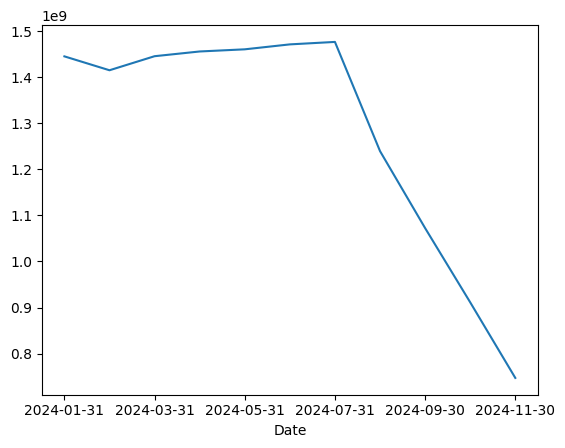

In [9]:
r['pool']['flow']["Balance"].loc["2024-01-31":"2024-11-30"].plot()

In [52]:
r['pool']['flow']["Balance"].loc["2024-01-31":]

Date
2024-01-31    1.444965e+09
2024-02-29    1.414818e+09
2024-03-31    1.445312e+09
2024-04-30    1.455577e+09
2024-05-31    1.460244e+09
2024-06-30    1.470964e+09
2024-07-31    1.476304e+09
2024-08-31    1.239345e+09
2024-09-30    1.072310e+09
2024-10-31    9.112579e+08
2024-11-30    7.472576e+08
2024-12-31    5.802508e+08
2025-01-31    4.101822e+08
2025-02-28    3.017012e+08
2025-03-31    2.054890e+08
2025-04-30    1.267854e+08
2025-05-31    6.519856e+07
2025-06-30    2.224581e+07
2025-07-31    2.000000e-02
Name: Balance, dtype: float64

In [9]:
r['pool']['flow']

,Balance,Principal,Interest,Prepayment,Default,Recovery,Loss,WAC,BorrowerNum,PrepayPenalty,CumPrincipal,CumPrepay,CumDelinq,CumDefault,CumRecovery,CumLoss
Date,,,,,,,,,,,,,,,,
2023-12-26,1.026577e+09,4.700568e+08,79904039.15,0,3366455.28,0,3366455.28,0.238000,None,None,4.700568e+08,0,0,3366455.28,0,3366455.28
2023-12-31,1.026577e+09,0.000000e+00,0.00,0,0.00,0,0.00,0.238000,None,None,4.700568e+08,0,0,3366455.28,0,3366455.28
2024-01-31,1.411261e+09,1.626682e+08,20342725.32,0,875901.95,0,875901.95,0.228507,None,None,6.327249e+08,0,0,4242357.23,0,4242357.23
2024-02-29,1.386010e+09,2.069779e+08,27144013.36,0,1204124.34,0,1204124.34,0.223914,None,None,8.397029e+08,0,0,5446481.57,0,5446481.57
2024-03-31,1.390445e+09,2.246093e+08,26433429.38,0,1106315.08,0,1106315.08,0.221756,None,None,1.064312e+09,0,0,6552796.65,0,6552796.65
2024-04-30,1.390049e+09,2.460917e+08,26259230.78,0,1186363.91,0,1186363.91,0.220756,None,None,1.310404e+09,0,0,7739160.56,0,7739160.56
2024-05-31,1.387983e+09,2.692195e+08,25994065.65,0,1147782.41,0,1147782.41,0.220303,None,None,1.579623e+09,0,0,8886942.97,0,8886942.97
2024-06-30,1.383506e+09,2.943595e+08,25692233.92,0,1184263.07,0,1184263.07,0.220104,None,None,1.873983e+09,0,0,10071206.04,0,10071206.04
2024-07-31,1.558816e+09,1.395682e+08,25342867.88,0,1142379.93,0,1142379.93,0.220103,None,None,2.013551e+09,0,0,11213585.97,0,11213585.97


In [31]:
r['ledgers']['abcd']

,balance,amount,comment
date,,,
2023-12-26,3366455.28,3366455.28,<TxnDirection:Credit>
2023-12-31,3366455.28,0.00,<TxnDirection:Credit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,0.00,-3366455.28,<TxnDirection:Credit>
2024-01-26,0.00,0.00,<TxnDirection:Credit>
2024-01-31,875901.95,875901.95,<TxnDirection:Credit>


In [55]:
r['ledgers']['abcd']

,balance,amount,comment
date,,,
2023-12-26,3366455.28,3366455.28,<TxnDirection:Credit>
2023-12-31,3366455.28,0.00,<TxnDirection:Credit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,3366455.28,0.00,<TxnDirection:Debit>
2024-01-26,0.00,-3366455.28,<TxnDirection:Credit>
2024-01-26,0.00,0.00,<TxnDirection:Credit>
2024-01-31,875901.95,875901.95,<TxnDirection:Credit>


In [17]:
r['accounts']['本金分账户']

,balance,change,memo
date,,,
2023-12-26,0.000000e+00,0.000000e+00,<Pool:CollectedRecoveries>
2023-12-26,0.000000e+00,0.000000e+00,<Pool:CollectedPrepayment>
2023-12-26,4.700568e+08,4.700568e+08,<Pool:CollectedPrincipal>
2023-12-31,4.700568e+08,0.000000e+00,<Pool:CollectedRecoveries>
2023-12-31,4.700568e+08,0.000000e+00,<Pool:CollectedPrepayment>
2023-12-31,4.700568e+08,0.000000e+00,<Pool:CollectedPrincipal>
2024-01-26,4.700568e+08,0.000000e+00,<SupportDraw:>
2024-01-26,4.700568e+08,0.000000e+00,<SupportDraw:>
2024-01-26,4.700568e+08,0.000000e+00,<SupportDraw:>


In [18]:
r['pool']['flow']

,Balance,Principal,Interest,Prepayment,Default,Recovery,Loss,WAC,BorrowerNum,PrepayPenalty,CumPrincipal,CumPrepay,CumDelinq,CumDefault,CumRecovery,CumLoss
Date,,,,,,,,,,,,,,,,
2023-12-26,1.026577e+09,4.700568e+08,79904039.15,0,3366455.28,0,3366455.28,0.238000,None,None,4.700568e+08,0,0,3366455.28,0,3366455.28
2023-12-31,1.026577e+09,0.000000e+00,0.00,0,0.00,0,0.00,0.238000,None,None,4.700568e+08,0,0,3366455.28,0,3366455.28
2024-01-31,1.411261e+09,1.626682e+08,20342725.32,0,875901.95,0,875901.95,0.228507,None,None,6.327249e+08,0,0,4242357.23,0,4242357.23
2024-02-29,1.386010e+09,2.069779e+08,27144013.36,0,1204124.34,0,1204124.34,0.223914,None,None,8.397029e+08,0,0,5446481.57,0,5446481.57
2024-03-31,1.390445e+09,2.246093e+08,26433429.38,0,1106315.08,0,1106315.08,0.221756,None,None,1.064312e+09,0,0,6552796.65,0,6552796.65
2024-04-30,1.390049e+09,2.460917e+08,26259230.78,0,1186363.91,0,1186363.91,0.220756,None,None,1.310404e+09,0,0,7739160.56,0,7739160.56
2024-05-31,1.387983e+09,2.692195e+08,25994065.65,0,1147782.41,0,1147782.41,0.220303,None,None,1.579623e+09,0,0,8886942.97,0,8886942.97
2024-06-30,1.383506e+09,2.943595e+08,25692233.92,0,1184263.07,0,1184263.07,0.220104,None,None,1.873983e+09,0,0,10071206.04,0,10071206.04
2024-07-31,1.558816e+09,1.395682e+08,25342867.88,0,1142379.93,0,1142379.93,0.220103,None,None,2.013551e+09,0,0,11213585.97,0,11213585.97


In [50]:
r['bonds']['A1']

,balance,interest,principal,rate,cash,memo
date,,,,,,
2024-01-26,450000000,1127465.75,0,0.0295,1.127466e+06,<PayInt:A1>
2024-02-26,450000000,1127465.75,0,0.0295,1.127466e+06,<PayInt:A1>
2024-03-26,450000000,1054726.02,0,0.0295,1.054726e+06,<PayInt:A1>
2024-04-26,450000000,1127465.75,0,0.0295,1.127466e+06,<PayInt:A1>
2024-05-26,450000000,1091095.89,0,0.0295,1.091096e+06,<PayInt:A1>
2024-06-26,450000000,1127465.75,0,0.0295,1.127466e+06,<PayInt:A1>
2024-07-26,450000000,1091095.89,0,0.0295,1.091096e+06,<PayInt:A1>
2024-08-26,252000000,1127465.75,198000000,0.0295,1.991275e+08,"[<PayInt:A1>, <PayPrin:A1>]"
2024-09-26,162000000,631380.82,90000000,0.0295,9.063138e+07,"[<PayInt:A1>, <PayPrin:A1>]"


In [58]:
r['bonds']['A2']

,balance,interest,principal,rate,cash,memo
date,,,,,,
2024-01-26,6.600000e+08,1681643.83,0.000000e+00,0.03,1.681644e+06,<PayInt:A2>
2024-02-26,6.600000e+08,1681643.83,0.000000e+00,0.03,1.681644e+06,<PayInt:A2>
2024-03-26,6.600000e+08,1573150.68,0.000000e+00,0.03,1.573151e+06,<PayInt:A2>
2024-04-26,6.600000e+08,1681643.83,0.000000e+00,0.03,1.681644e+06,<PayInt:A2>
2024-05-26,6.600000e+08,1627397.26,0.000000e+00,0.03,1.627397e+06,<PayInt:A2>
2024-06-26,6.600000e+08,1681643.83,0.000000e+00,0.03,1.681644e+06,<PayInt:A2>
2024-07-26,6.600000e+08,1627397.26,0.000000e+00,0.03,1.627397e+06,<PayInt:A2>
2024-08-26,5.994169e+08,1681643.83,6.058314e+07,0.03,6.226478e+07,"[<PayInt:A2>, <PayPrin:A2>]"
2024-09-26,5.381734e+08,1527281.32,6.124348e+07,0.03,6.277076e+07,"[<PayInt:A2>, <PayPrin:A2>]"


In [62]:
r['bonds']['B']

,balance,interest,principal,rate,cash,memo
date,,,,,,
2024-01-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,<PayInt:B>
2024-02-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,<PayInt:B>
2024-03-26,1.650000e+08,458835.61,0.000000e+00,0.035,4.588356e+05,<PayInt:B>
2024-04-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,<PayInt:B>
2024-05-26,1.650000e+08,474657.53,0.000000e+00,0.035,4.746575e+05,<PayInt:B>
2024-06-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,<PayInt:B>
2024-07-26,1.650000e+08,474657.53,0.000000e+00,0.035,4.746575e+05,<PayInt:B>
2024-08-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,"[<PayInt:B>, <PayPrin:B>]"
2024-09-26,1.650000e+08,490479.45,0.000000e+00,0.035,4.904795e+05,"[<PayInt:B>, <PayPrin:B>]"


In [63]:
r['bonds']['R']

,balance,interest,principal,rate,cash,memo
date,,,,,,
2024-08-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2024-09-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2024-10-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2024-11-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2024-12-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2025-01-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2025-02-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2025-03-26,2.250000e+08,0,0.00,0,0.00,"[<PayPrin:R>, <PayYield:R>]"
2025-04-26,1.794890e+08,0,45510979.01,0,45510979.01,"[<PayPrin:R>, <PayYield:R>]"


In [41]:
r['pricing']

,pricing,face,WAL,duration,convexity,accure interest
A1,4.516386e+08,100.364134,0.76,0.761861,1.29,0
A2,6.632992e+08,100.499875,0.95,0.946253,1.77,0
B,1.669481e+08,101.180658,1.16,1.144510,2.35,0
R,5.608880e+08,249.283543,1.25,1.380417,3.14,0
